In [1]:
# !pip install jieba
# !pip install seaborn
# !pip install pyecharts
# !pip install pillow
# !pip install wordcloud
# !pip install numpy
# !pip install scipy
# !pip install imageio

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' c

In [13]:
import jieba
import numpy as np
from PIL import Image
import wordcloud
import pandas as pd
import seaborn as sns
import pyecharts
import matplotlib
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator  # 词云库
from imageio import imread
from pyecharts import Bar

In [42]:
df = pd.read_csv('jay.csv')

In [23]:
def cut_lyrics(df):
    all_lyrics = df.歌词.tolist()
    one_lyrics = ''
    for lyrics in all_lyrics :
        lyrics_list =  lyrics.replace("\t","").split('\n\n')
        for i in range(len(lyrics_list)-1):
            one_lyrics += lyrics_list[i].replace("\n","").lower()
    #print(one_lyrics)
    words = jieba.cut(one_lyrics)
    #set stopwords
    filepath = 'stopwords.txt'
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    stopwords.extend(['oh','hey','go','ya','我会','不到','真的','公公','想要','混音','不用','录音师'])
    #remove stopwords
    processed_word_list = []
    for word in words:
        if word not in stopwords and len(word)>1: #remove single word
            processed_word_list.append(word)
    return processed_word_list

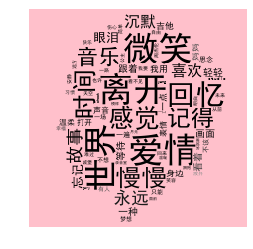

In [43]:
def word_cloud(processed_word_list, rank=100):
    word_count100 = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[:rank]
    word_count100_dict = word_count100.to_dict()
    result = " ".join(word_count100_dict)
    image = imread("jay1.jpg")
    wc = WordCloud(
        font_path="simhei.ttf",
        background_color='pink',
        max_font_size=35,
        # 词云形状
        mask=image
    )
    wc.generate(result)
    image_color = ImageColorGenerator(image)
    wc.recolor(color_func=image_color)
    wc.to_file("jay_worldcloud.png")
    plt.figure("jay1")
    # 以图片的形式显示词云
    plt.imshow(wc)
    # 关闭图像坐标系 不显示坐标轴
    plt.axis("off")
    plt.show()
    
processed_word_list = cut_lyrics(df)
word_cloud(processed_word_list)

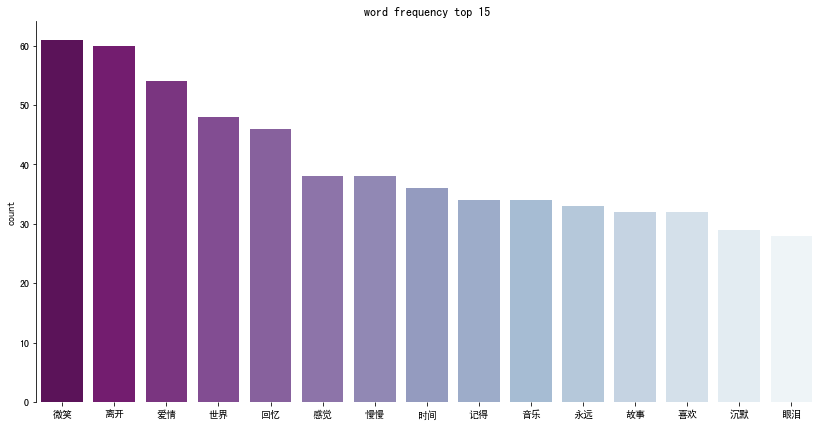

In [44]:
def word_count_bar(inputs):
    fig = plt.figure(figsize=(14,7))  
    x =inputs.index.tolist()  
    y = inputs.values.tolist() 
    sns.barplot(x, y, palette="BuPu_r")  
    plt.title('word frequency top 15')  
    plt.ylabel('count')  
    sns.despine(bottom=True)  
    #plt.savefig('./word_count_bar.png',dpi=400)  
    plt.show() 
word_count = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[:15]
word_count_bar(word_count)

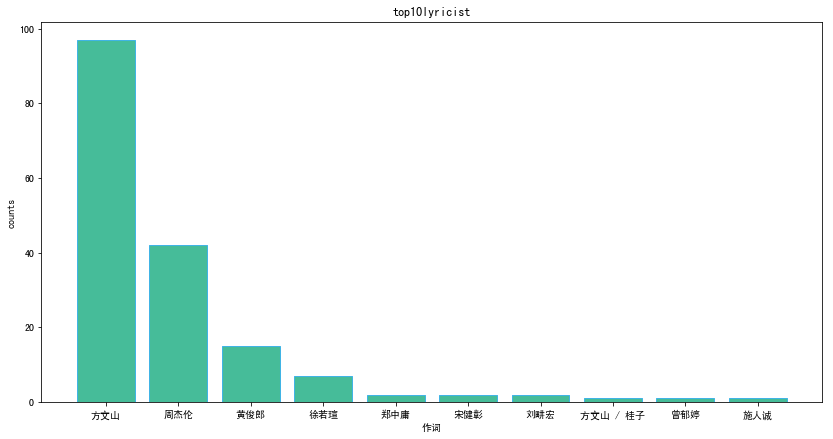

In [52]:
def show_top_lyrist(df, rank = 10):
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

    lyricist_counts=df['作词'].value_counts()[:rank].sort_values(ascending=False) #sort values
    作词 = pd.DataFrame(lyricist_counts)
    fig = plt.figure(figsize=(14,7)) #adjust size
    plt.bar(作词.index, 作词.作词,color = '#46bc99',edgecolor = '#40b4e5')
    plt.title('top'+str(rank)+'lyricist') #plot title and label name
    plt.xlabel('作词')
    plt.ylabel('counts')
    plt.show()
show_top_lyrist(df)

In [53]:
pd_df1 = df.groupby(['专辑名'])['分享数'].mean().reset_index().sort_values("分享数",ascending=False)
pd_df2 = df.groupby(['专辑名'])['评论数'].mean().reset_index().sort_values("评论数",ascending=False)
attr = pd_df1.专辑名
v1 = pd_df1.分享数
v2 = pd_df2.评论数
bar = Bar("从评论数和分享数看周杰伦专辑")
bar.add("分享数", attr, v1, mark_line=["average"])
bar.add("评论数", attr, v2, mark_line=["average"])
bar.render()
